In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from pyproj import Proj, transform

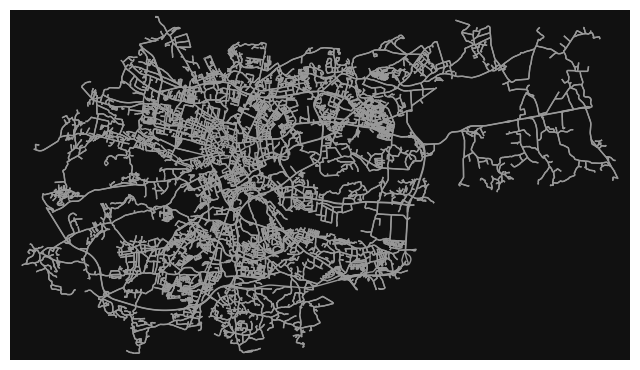

In [2]:
G = ox.load_graphml('Krakow.graphml')
fig, ax = ox.plot_graph(G, node_size=0)

<AxesSubplot: >

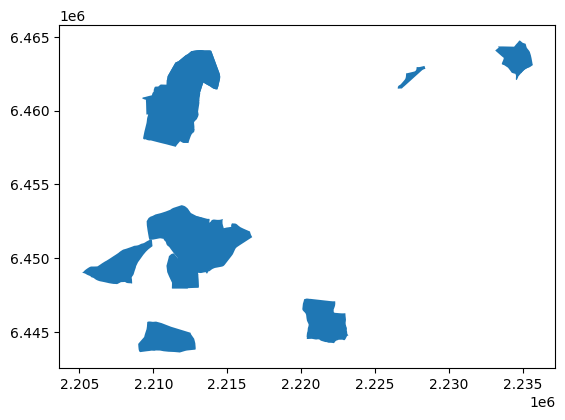

In [3]:
# Replace 'name.shp' with the actual name of your shapefile
shapefile_path = 'Obszary_SUM.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Extract the geometries
geometries = gdf['geometry']
gdf.plot()
# plt.savefig('KRK_areas.jpg', dpi=100)

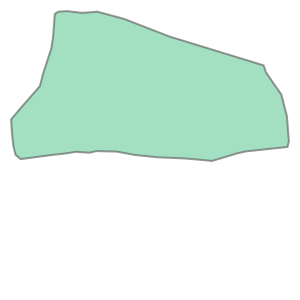

In [4]:
gdf.loc[12].geometry

In [5]:
polygon = gdf.loc[12].geometry
xx = polygon.exterior.coords.xy[0]
x_center = sum(xx) / len(xx)

yy = polygon.exterior.coords.xy[1]
y_center = sum(yy) / len(yy)

print(x_center,',', y_center)

2210722.851631865 , 6444446.554262988


19.859261265731988 , 49.98943585717581


C:\Users\shuli\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\shuli\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\shuli\AppData\Local\Temp\ipykernel_2400\3951718954.py:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = tra

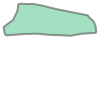

In [6]:
source_crs = Proj(init='epsg:3857')
target_crs = Proj(init='epsg:4326')

x, y = polygon.exterior.xy
lon, lat = transform(source_crs, target_crs, x, y)

converted_polygon = Polygon(zip(lon, lat))
#---------------------------------------
polygon = converted_polygon

xx = polygon.exterior.coords.xy[0]
x_center = sum(xx) / len(xx)

yy = polygon.exterior.coords.xy[1]
y_center = sum(yy) / len(yy)

print(x_center,',', y_center)
polygon

In [7]:
#----------------------------------------------------------

total number of zones is  396


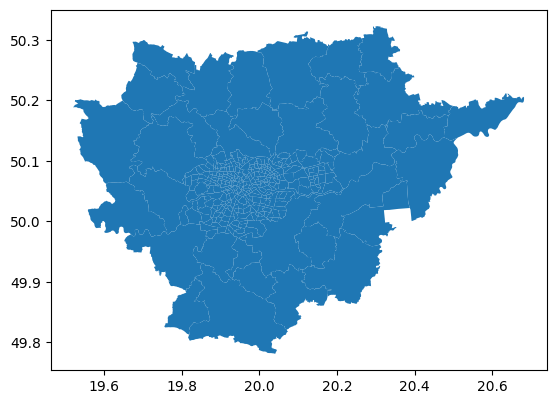

In [8]:
shapefile_path = 'krk.geojson'
gdf = gpd.read_file(shapefile_path)

geometries = gdf['geometry']
gdf.plot()

print('total number of zones is ', len(gdf))

In [9]:
gdf

,NO,NAME,AREAKM2,geometry
0,1,None,0.5775km2,"MULTIPOLYGON (((19.93249 50.06053, 19.93219 50..."
1,2,None,0.3090km2,"MULTIPOLYGON (((19.93327 50.05873, 19.93373 50..."
2,3,None,0.0985km2,"MULTIPOLYGON (((19.92888 50.05606, 19.92924 50..."
3,4,None,0.0742km2,"MULTIPOLYGON (((19.92508 50.05932, 19.92523 50..."
4,5,None,0.1035km2,"MULTIPOLYGON (((19.92749 50.05978, 19.92786 50..."
...,...,...,...,...
391,1029,Świątniki Górne,20.3482km2,"MULTIPOLYGON (((19.92996 49.90533, 19.92976 49..."
392,1030,Wieliczka,99.6750km2,"MULTIPOLYGON (((19.96288 49.97122, 19.96288 49..."
393,1031,Wielka Wieś,48.2701km2,"MULTIPOLYGON (((19.86357 50.10262, 19.86372 50..."
394,1032,Zabierzów,99.4200km2,"MULTIPOLYGON (((19.71640 50.16166, 19.71649 50..."


In [10]:
polygon = gdf.loc[12].geometry
xx = polygon[0].exterior.coords.xy[0]
x_center = sum(xx) / len(xx)

yy = polygon[0].exterior.coords.xy[1]
y_center = sum(yy) / len(yy)

print(x_center,',', y_center)
# CRS is already epsg:4326. So, there is no need to conversion.

19.942551241210392 , 50.06760954645445


C:\Users\shuli\AppData\Local\Temp\ipykernel_2400\3357276857.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xx = polygon[0].exterior.coords.xy[0]
C:\Users\shuli\AppData\Local\Temp\ipykernel_2400\3357276857.py:5: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  yy = polygon[0].exterior.coords.xy[1]


In [11]:
df = pd.read_csv('demografia_KRK.csv')
df

,FID,x,y,adr_pelny,ogolem
0,0,19.996604,50.086510,STANISŁAWA SKARŻYŃSKIEGO 9,975
1,1,20.014369,50.083876,OSIEDLE KOŚCIUSZKOWSKIE 6,955
2,2,19.997005,50.085446,STANISŁAWA SKARŻYŃSKIEGO 5,832
3,3,20.021469,50.086969,OSIEDLE KAZIMIERZOWSKIE 29,785
4,4,19.996731,50.084792,STANISŁAWA SKARŻYŃSKIEGO 3,775
...,...,...,...,...,...
47705,47705,19.978465,50.072244,OSTATNIA 27,1
47706,47706,19.954666,50.057313,KAROLA CHODKIEWICZA 10C,1
47707,47707,19.879556,50.085813,WŁODZIMIERZA TETMAJERA 17A,1
47708,47708,20.008240,50.071772,POLESKA 12A,1


In [12]:
point = Point(20.014369,50.086510)
for i in range(0,len(gdf)):
    if gdf.geometry[i].contains(point):
        print(gdf.NO[i])

235


In [13]:
def find_containing_polygon(point, gdf):
    for i in range(0,len(gdf)):
        if gdf.geometry[i].contains(point):
            return int(gdf.NO[i])
            break
        elif i==len(gdf)-1:
            return None
        
df['zone_NO'] = df.apply(lambda row: find_containing_polygon(Point(row['x'], row['y']),gdf), axis=1)  
df

,FID,x,y,adr_pelny,ogolem,zone_NO
0,0,19.996604,50.086510,STANISŁAWA SKARŻYŃSKIEGO 9,975,147.0
1,1,20.014369,50.083876,OSIEDLE KOŚCIUSZKOWSKIE 6,955,234.0
2,2,19.997005,50.085446,STANISŁAWA SKARŻYŃSKIEGO 5,832,147.0
3,3,20.021469,50.086969,OSIEDLE KAZIMIERZOWSKIE 29,785,239.0
4,4,19.996731,50.084792,STANISŁAWA SKARŻYŃSKIEGO 3,775,147.0
...,...,...,...,...,...,...
47705,47705,19.978465,50.072244,OSTATNIA 27,1,145.0
47706,47706,19.954666,50.057313,KAROLA CHODKIEWICZA 10C,1,53.0
47707,47707,19.879556,50.085813,WŁODZIMIERZA TETMAJERA 17A,1,202.0
47708,47708,20.008240,50.071772,POLESKA 12A,1,264.0


In [14]:
# remove the trips with nan zone

nan_mask = df['zone_NO'].isna()
nan_indices = df[nan_mask].index.tolist()

if len(nan_indices)>0:
    df.drop(nan_indices, inplace=True)
    df.reset_index(drop=True, inplace=True)

df

,FID,x,y,adr_pelny,ogolem,zone_NO
0,0,19.996604,50.086510,STANISŁAWA SKARŻYŃSKIEGO 9,975,147.0
1,1,20.014369,50.083876,OSIEDLE KOŚCIUSZKOWSKIE 6,955,234.0
2,2,19.997005,50.085446,STANISŁAWA SKARŻYŃSKIEGO 5,832,147.0
3,3,20.021469,50.086969,OSIEDLE KAZIMIERZOWSKIE 29,785,239.0
4,4,19.996731,50.084792,STANISŁAWA SKARŻYŃSKIEGO 3,775,147.0
...,...,...,...,...,...,...
47704,47705,19.978465,50.072244,OSTATNIA 27,1,145.0
47705,47706,19.954666,50.057313,KAROLA CHODKIEWICZA 10C,1,53.0
47706,47707,19.879556,50.085813,WŁODZIMIERZA TETMAJERA 17A,1,202.0
47707,47708,20.008240,50.071772,POLESKA 12A,1,264.0


In [15]:
xlsx_file = pd.ExcelFile('Krakow_model_OD_matrices.xlsx')
od = pd.read_excel(xlsx_file, 'AM_peak_PuT_prob')
od

,464 x 464,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,111144,111145,111146,111147,111148,111149,111150,111151,Unnamed: 467,Unnamed: 468
0,NaN,Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DK94 (Czyżów) - Metropolia,A4 (Niepołomice) - Metropolia,DK75 (Niepołomice) - Metropolia,DW964 (Ispina) - Metropolia,DK79 (Nowe Brzesko) - Metropolia,DW964 (Posądza) - Metropolia,DP (Łoskowice) - Metropolia,DP (Polanowice) - Metropolia,NaN,NaN
1,NaN,NaN,Sum,2015.498655,690.500438,133.437003,233.015785,372.647176,985.102155,694.674881,...,0,0,0,0,0,0,0,0,NaN,75789.715667
2,1,NaN,310.354222,0.061890,0.018102,0.004377,0.006011,0.010294,0.024266,0.021808,...,0,0,0,0,0,0,0,0,NaN,1.000000
3,2,NaN,73.210037,0.048381,0.023088,0.006267,0.006421,0.011053,0.021941,0.019602,...,0,0,0,0,0,0,0,0,NaN,1.000000
4,3,NaN,108.04154,0.067655,0.031475,0.008180,0.010524,0.015484,0.030465,0.027358,...,0,0,0,0,0,0,0,0,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,are9(SUM),NaN,NaN,0.021304,0.006733,0.001494,0.002668,0.004469,0.018280,0.011588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
471,are10(SUM),NaN,NaN,0.013857,0.006007,0.001424,0.003281,0.003832,0.007374,0.005305,...,0,0,0,0,0,0,0,0,NaN,1.000000
472,are11(SUM),NaN,NaN,0.016750,0.006931,0.001463,0.002823,0.004777,0.009853,0.006701,...,0,0,0,0,0,0,0,0,NaN,1.000000
473,are12(SUM),NaN,NaN,0.031663,0.010865,0.001737,0.002436,0.005911,0.016254,0.011220,...,0,0,0,0,0,0,0,0,NaN,1.000000


In [16]:
od.drop([0,1], inplace=True)
od.rename(columns = {'464 x 464':'zone_NO'}, inplace = True) 
od.drop(['Unnamed: 1','Unnamed: 2', 'Unnamed: 467', 'Unnamed: 468'], inplace=True, axis=1)
od.reset_index(drop=True, inplace=True)
od

,zone_NO,1,2,3,4,5,6,7,8,9,...,111142,111143,111144,111145,111146,111147,111148,111149,111150,111151
0,1,0.061890,0.018102,0.004377,0.006011,0.010294,0.024266,0.021808,0.007001,0.006348,...,0,0,0,0,0,0,0,0,0,0
1,2,0.048381,0.023088,0.006267,0.006421,0.011053,0.021941,0.019602,0.004942,0.003140,...,0,0,0,0,0,0,0,0,0,0
2,3,0.067655,0.031475,0.008180,0.010524,0.015484,0.030465,0.027358,0.006848,0.004538,...,0,0,0,0,0,0,0,0,0,0
3,4,0.050860,0.020925,0.005200,0.014668,0.015530,0.029893,0.022250,0.007064,0.004420,...,0,0,0,0,0,0,0,0,0,0
4,5,0.059896,0.024383,0.006316,0.013302,0.016838,0.031121,0.028259,0.007068,0.004620,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,are9(SUM),0.021304,0.006733,0.001494,0.002668,0.004469,0.018280,0.011588,0.004261,0.002400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,are10(SUM),0.013857,0.006007,0.001424,0.003281,0.003832,0.007374,0.005305,0.002349,0.002023,...,0,0,0,0,0,0,0,0,0,0
470,are11(SUM),0.016750,0.006931,0.001463,0.002823,0.004777,0.009853,0.006701,0.002411,0.001799,...,0,0,0,0,0,0,0,0,0,0
471,are12(SUM),0.031663,0.010865,0.001737,0.002436,0.005911,0.016254,0.011220,0.003720,0.002156,...,0,0,0,0,0,0,0,0,0,0


In [17]:
zone_list = list(gdf.NO)

for i in range(0,len(od)):
    if od.loc[i].zone_NO not in zone_list:
        od.drop(i, inplace=True)

cols = list(od.columns)
cols.remove('zone_NO')

for i in cols:
    if i not in zone_list:
        od.drop(i, inplace=True, axis=1)

od

,zone_NO,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,1,0.061890,0.018102,0.004377,0.006011,0.010294,0.024266,0.021808,0.007001,0.006348,...,0,0.004132,0,0,0,0.000424,0.002752,0.000868,0.004074,0.000628
1,2,0.048381,0.023088,0.006267,0.006421,0.011053,0.021941,0.019602,0.004942,0.003140,...,0,0.005026,0,0,0,0.000509,0.003313,0.001057,0.005001,0.000783
2,3,0.067655,0.031475,0.008180,0.010524,0.015484,0.030465,0.027358,0.006848,0.004538,...,0,0.003478,0,0,0,0.000363,0.002391,0.000736,0.003431,0.000611
3,4,0.050860,0.020925,0.005200,0.014668,0.015530,0.029893,0.022250,0.007064,0.004420,...,0,0.003862,0,0,0,0.000401,0.002632,0.000821,0.003839,0.000657
4,5,0.059896,0.024383,0.006316,0.013302,0.016838,0.031121,0.028259,0.007068,0.004620,...,0,0.003265,0,0,0,0.000343,0.002257,0.000693,0.003224,0.000573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1029,0.033950,0.011643,0.001869,0.002606,0.006286,0.017235,0.011929,0.003968,0.002353,...,0,0,0,0,0,0,0,0,0,0.000149
392,1030,0.032981,0.011298,0.001797,0.002470,0.006091,0.016820,0.011623,0.003844,0.002244,...,0,0,0,0,0,0,0,0,0.000106,0
393,1031,0.033896,0.011611,0.001846,0.002552,0.006283,0.017257,0.011925,0.003939,0.002276,...,0,0,0,0,0,0,0,0,0.010242,0.000388
394,1032,0.033864,0.011620,0.001822,0.002471,0.006290,0.017266,0.011914,0.003890,0.002198,...,0,0,0,0,0,0,0.000153,0.005407,0,0


In [18]:
# Filter the trips based on a specific polygon
shapefile_path = 'Obszary_SUM.shp'
gdf = gpd.read_file(shapefile_path)
poly = gdf.geometry[12]

source_crs = Proj(init='epsg:3857')
target_crs = Proj(init='epsg:4326')

x, y = poly.exterior.xy
lon, lat = transform(source_crs, target_crs, x, y)

poly = Polygon(zip(lon, lat))

df['inside_poly'] = df.apply(lambda row: poly.contains(Point(row['x'], row['y'])), axis=1)
filtered_trips = df[df.inside_poly==True]
filtered_trips

C:\Users\shuli\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\shuli\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\shuli\AppData\Local\Temp\ipykernel_2400\252886228.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = tra

,FID,x,y,adr_pelny,ogolem,zone_NO,inside_poly
8997,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True
9228,9228,19.869115,49.987941,NA KLIŃCU 3,11,311.0,True
9231,9231,19.849490,49.991108,BERNARDA WAPOWSKIEGO 6,11,311.0,True
9794,9794,19.859122,49.990682,MIECZYSŁAWA WRONY 48,10,311.0,True
10054,10054,19.850119,49.993839,SKOTNICKA 260,10,311.0,True
...,...,...,...,...,...,...,...
46959,46960,19.863690,49.989880,MIECZYSŁAWA WRONY 78B,1,311.0,True
47264,47265,19.874247,49.987493,CHLEBICZNA 7A,1,311.0,True
47392,47393,19.853785,49.993557,TADEUSZA HOLLENDRA 21,1,311.0,True
47577,47578,19.861169,49.988051,BŁOTNISKA 13,1,311.0,True


### further for preselected area

In [19]:
df12 = df[df.inside_poly==True] #demografia of the area 10
df = df12.loc[df12.index.repeat(df12.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people
df

,FID,x,y,adr_pelny,ogolem,zone_NO,inside_poly
0,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True
1,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True
2,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True
3,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True
4,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True
...,...,...,...,...,...,...,...
1588,46960,19.863690,49.989880,MIECZYSŁAWA WRONY 78B,1,311.0,True
1589,47265,19.874247,49.987493,CHLEBICZNA 7A,1,311.0,True
1590,47393,19.853785,49.993557,TADEUSZA HOLLENDRA 21,1,311.0,True
1591,47578,19.861169,49.988051,BŁOTNISKA 13,1,311.0,True


In [20]:
df['probs'] = [[]] * len(df)
df['desti_zones'] = [[]] * len(df)

for i in range(0, len(df)):
    # print(i)
    z = int(df.iloc[i].zone_NO)
    row = od.loc[od['zone_NO'] == z].iloc[0]
    row = row[1:]
    df.at[i, 'desti_zones'] = list(row.index)
    df.at[i, 'probs'] =list(row)
    dic = row.to_dict()
    df.at[i, 'prob_dict'] = [dic]

df

,FID,x,y,adr_pelny,ogolem,zone_NO,inside_poly,probs,desti_zones,prob_dict
0,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{1: 0.011470104029093346, 2: 0.004750659559184..."
1,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
2,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
3,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
4,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
...,...,...,...,...,...,...,...,...,...,...
1588,46960,19.863690,49.989880,MIECZYSŁAWA WRONY 78B,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
1589,47265,19.874247,49.987493,CHLEBICZNA 7A,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
1590,47393,19.853785,49.993557,TADEUSZA HOLLENDRA 21,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."
1591,47578,19.861169,49.988051,BŁOTNISKA 13,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918..."


In [21]:
import ast
import random

# df['desti_zone'] = df.apply(lambda row: random.choices(row.desti_zones, weights=row.probs, k=1)[0], axis=1)
df['desti_zone'] = df.apply(lambda row: random.choices(row.desti_zones, weights=row.probs, k=1)[0], axis=1)

<AxesSubplot: >

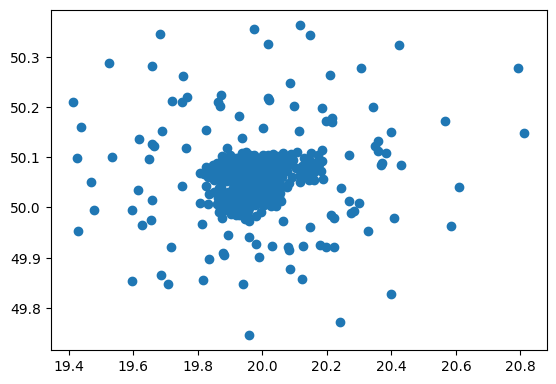

In [22]:
shapefile_path = 'krk_centroid.geojson'
gdf = gpd.read_file(shapefile_path)

geometries = gdf['geometry']
gdf.plot()

In [23]:
df['desti_x'] = df.apply(lambda row: gdf[gdf.NO==row.desti_zone].geometry.iloc[0].coords.xy[0][0], axis=1)
df['desti_y'] = df.apply(lambda row: gdf[gdf.NO==row.desti_zone].geometry.iloc[0].coords.xy[1][0], axis=1)

In [24]:
df.to_csv('demand_distribution_area12.csv')

# START-------------------------------------------------------------

In [60]:
df = pd.read_csv('demand_distribution_area12.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,FID,x,y,adr_pelny,ogolem,zone_NO,inside_poly,probs,desti_zones,prob_dict,desti_zone,desti_x,desti_y
0,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{1: 0.011470104029093346, 2: 0.004750659559184...",72,19.952185,50.025729
1,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",158,19.985074,50.053036
2,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",89,19.906643,50.030131
3,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",88,19.896833,50.023390
4,8997,19.852584,49.992373,BERNARDA WAPOWSKIEGO 32,12,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",311,19.865175,49.990338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,46960,19.863690,49.989880,MIECZYSŁAWA WRONY 78B,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",81,19.914575,50.024170
1589,47265,19.874247,49.987493,CHLEBICZNA 7A,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",179,19.918732,50.013769
1590,47393,19.853785,49.993557,TADEUSZA HOLLENDRA 21,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",311,19.865175,49.990338
1591,47578,19.861169,49.988051,BŁOTNISKA 13,1,311.0,True,"[0.011470104029093346, 0.004750659559184594, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[{1: 0.011470104029093346, 2: 0.00475065955918...",148,19.994032,50.077641


In [29]:
df.to_csv('Demand_area12.csv')